<a href="https://colab.research.google.com/github/ufairahbashir/googlecolab/blob/main/T3_H071201091_ufairah_damara_bashir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 3 pemrosesan data citra

Nama: Ufairah Damara Bashir
<br>Nim: H071201091

### Library


In [ ]:
import cv2
from matplotlib import pyplot as plt
from skimage import io
from skimage import color
from skimage import data
from pylab import *
import numpy as np
import os
from PIL import Image
import pandas as pd

from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

mount to gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Diberikan citra girl-warna.bmp, Tampilkan hasil transformasi citra tersebut ke model warna:
  a. YCbCr
  <br>b. HSI
  <br>c. YIQ
  <br>d. YUV
<br>(tampilkan citra untuk masing-masing komponen)

<Figure size 720x432 with 0 Axes>

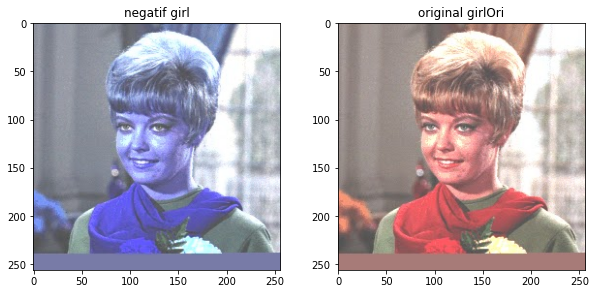

In [ ]:
#tampilkan gambar girl_warna = girlw
girl = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/PDC/girl-warna.bmp')
plt.figure(figsize = (10,6))

#karena warnanya akan negatif, maka diubah supaya menghasilkan gambar yang sebenarnya
girlOri = cv2.cvtColor(girl, cv2.COLOR_BGR2RGB)

#bikin axis untuk membandingkan
fig = plt.figure(num= None, figsize=(10,10))

ax = fig.add_subplot(2, 2, 1)
plt.title("negatif girl")
plt.imshow(girl)

ax = fig.add_subplot(2, 2, 2)
plt.title("original girlOri")
plt.imshow(girlOri)

In [ ]:
#girlOri ke YCbCr
ycbcr = cv2.cvtColor(girlOri, cv2.COLOR_YCrCb2BGR)

In [ ]:
#girlOri ke HCI. karena cv2 tidak mempunyai konversi warna dari rgb ke hci maka dibuatkan tersendiri
import math
girlb = np.float32(girlOri)/255

#pisahkan warna biru, hijau dan merah
b = girlb[:,:,0]
g = girlb[:,:,1]
r = girlb[:,:,2]

#hitung intesitas
def calc_intensity(red, blue, green):
            return np.divide(b + g +r, 3)

#hitung saturasi
def calc_saturation(red, blue, green):
    minimum = np.minimum(np.minimum(r, g), b)
    saturation = 1 - (3 / (r + g + b + 0.001) * minimum)
    return saturation

#hitung hu
def calc_hue(red, blue, green):
  hue = np.copy(red)
  for i in range(0, blue.shape[0]):
    for j in range(0, blue.shape[1]):
      hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
      math.sqrt((red[i][j] - green[i][j])**2 +((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
      hue[i][j] = math.acos(hue[i][j])
      if blue[i][j] <= green[i][j]:
        hue[i][j] = hue[i][j]
      else:
          hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]
      return hue

#Merge channels into picture and return image
hsi = cv2.merge((calc_hue(r, b, g), calc_saturation(r, b, g), calc_intensity(r, b, g)))

In [ ]:
#girlOri ke YIQ
yiq = color.rgb2yiq(girlOri)

In [ ]:
#girlOri ke YUV
yuv = cv2.cvtColor(girlOri, cv2.COLOR_RGB2YUV)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show>

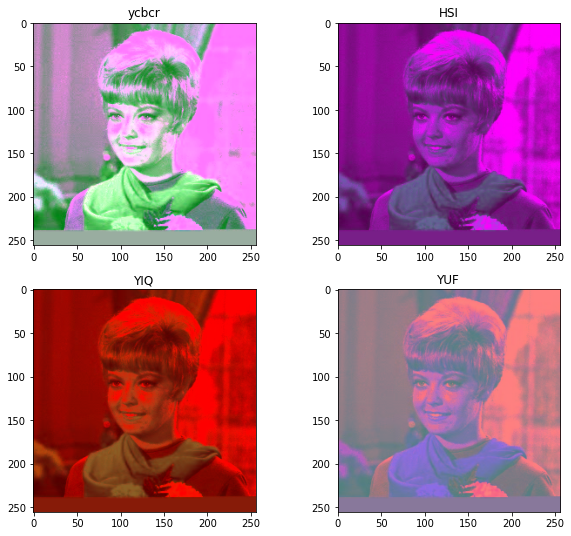

In [ ]:
#menampilkan semuanya

fig = plt.figure(num= None, figsize=(10,9))
ax = fig.add_subplot(2, 2, 1)
plt.title("ycbcr")
plt.imshow(ycbcr)

ax = fig.add_subplot(2, 2, 2)
plt.title("HSI")
plt.imshow(hsi)

ax = fig.add_subplot(2, 2, 3)
plt.title("YIQ")
plt.imshow(yiq)

ax = fig.add_subplot(2, 2, 4)
plt.title("YUF")
plt.imshow(yuv)

plt.show

### 2. Tentukan nilai threshold dengan metode otsu dari citra montain.bmp dan tampilkan hasil threshold-nya.

In [ ]:
#tampilkan gambar
gng = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/PDC/mountain.bmp',0)

#nilai histogram nya apa
hs = cv2.calcHist([gng], [0], None, [256], [0,256])
hist_norm = hs.ravel()/hs.sum()
Q = hist_norm.cumsum()

bins = np.arange(256)
fn_min = np.inf
thresh = -1

for i in range(1,256):
    #probabilitas
    p1,p2 = np.hsplit(hist_norm,[i])
    #jumlah semua class
    q1,q2 = Q[i],Q[255]-Q[i]
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue
    b1,b2 = np.hsplit(bins,[i]) # weights
    # mencari mean dan varian
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # menghitung dan mengatur fungsi
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# nilai otsu
(ret, otsu) = cv2.threshold(gng,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )


138 137.0


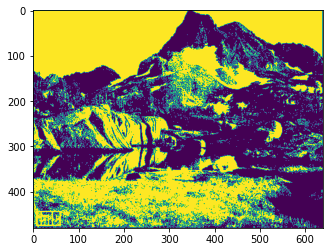

In [ ]:
(ret, otsu) = cv2.threshold(gng,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu)

### 3. Dengan menggunakan segmentasi dan proses citra biner, proses citra coints.png sehingga seluruh background menjadi hitam dan tidak terdapat bagian yang berlubang pada bagian koin dari citra tersebut.

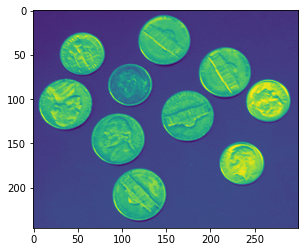

In [ ]:
coin = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/PDC/coints.png',0)
#ubah jadi hitam putih
# coin = cv2.cvtColor(coin, cv2.IMREAD_GRAYSCALE)
plt.imshow(coin)

<function matplotlib.pyplot.show>

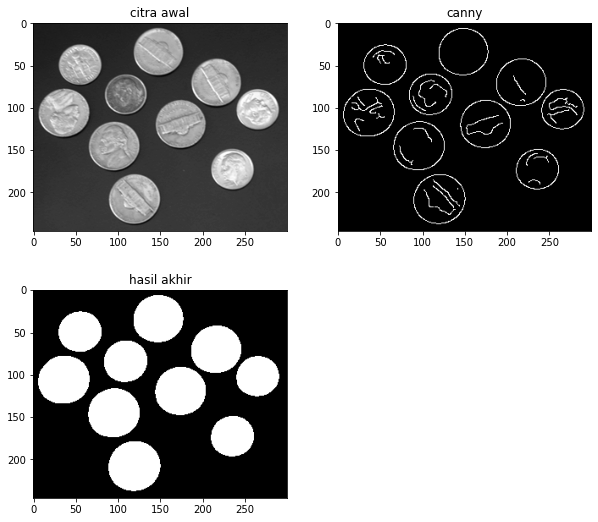

In [ ]:
from matplotlib import pylab, mlab, pyplot
from scipy import ndimage
from skimage import filters, feature

#canny&&threshold
coinc = feature.canny(coin, sigma = 2)
coinsg = ndimage.binary_fill_holes(coinc)


#menampilkan semuanya
fig = plt.figure(num= None, figsize=(10,9))
ax = fig.add_subplot(2, 2, 1)
plt.title("citra awal")
plt.imshow(coin, cmap ='gray')

ax = fig.add_subplot(2, 2, 2)
plt.title("canny")
plt.imshow(coinc, cmap ='gray')

ax = fig.add_subplot(2, 2, 3)
plt.title("hasil akhir")
plt.imshow(coinsg, cmap ='gray')


plt.show

### 4. Segmentasi citra peppers.tiff menggunakan K-Mean dengan nilai K = 3 berdasarkan warna.

(7350, 3)


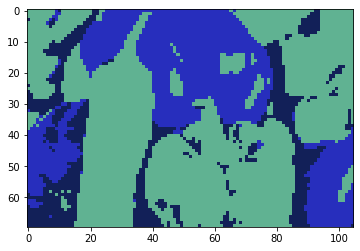

In [ ]:
p = cv2.imread("/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/PDC/pepper.tiff")

#ubah warna ke format rgb
paa = cv2.cvtColor(p, cv2.COLOR_BGR2RGB)

# reshape gambar ke array 2d (RGB)
ppv = p.reshape((-1, 3))
ppv = np.float32(ppv)

print(ppv.shape)

# definsikan iterasi misalkan 100 dan nilai epsilon 0.2
x = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#angka k-means sesuai soal k= 3
k = 3
_, x, (a) = cv2.kmeans(ppv, k, None, x, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert kembali ke 8 bit values
a = np.uint8(a)

x = x.flatten()

# convert semua pixel ke warna centroids
centroid = a[x.flatten()]

# reshape kembali dimensi gambar ori
oriback= centroid.reshape(p.shape)

# show the image
plt.imshow(oriback)